## Anticipez les besoin energétique d'une ville

#### Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.


Liste et descriptions des colonnes

OSEBuildingIDA

unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.

DataYear

BuildingTypeCity of Seattle

building type classification.

PrimaryPropertyType

The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.

PropertyName

Official or common property name.

TaxParcelIdentificationNumber

Property King County PIN

Location

CouncilDistrictCode

Property City of Seattle council district.

Neighborhood => Quartier

YearBuiltYear

in which a property was constructed or underwent a complete renovation.

NumberofBuildings

NumberofFloors

PropertyGFATotal

Total building and parking gross floor area.

PropertyGFAParking

Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).

PropertyGFABuilding(s)

Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.

ListOfAllPropertyUseTypes

LargestPropertyUseType

LargestPropertyUseTypeGFA

SecondLargestPropertyUseType

SecondLargestPropertyUseTypeGFA

ThirdLargestPropertyUseType

ThirdLargestPropertyUseTypeGFA

YearsENERGYSTARCertified

ENERGYSTARScore

An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.

SiteEUI(kBtu/sf)

Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.

SiteEUIWN(kBtu/sf)

Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

SourceEUI(kBtu/sf)

Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

SourceEUIWN(kBtu/sf)

Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

SiteEnergyUse(kBtu)

The annual amount of energy consumed by the property from all sources of energy.

SiteEnergyUseWN(kBtu)

SteamUse(kBtu)

The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).

Electricity(kWh)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.

Electricity(kBtu)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

NaturalGas(therms)

The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

La quantité annuelle de gaz naturel fourni par le service public consommée par la propriété, mesurée en therm

NaturalGas(kBtu)

OtherFuelUse(kBtu)

GHGEmissions(MetricTonsCO2e)

The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

La quantité totale d'émissions de gaz à effet de serre, y compris les émissions de dioxyde de carbone, de méthane et d'oxyde nitreux rejetées dans l'atmosphère en raison de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent en dioxyde de carbone. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources génératrices de Seattle CIty Light. Ceci utilise le facteur d'émissions 2015 de Seattle City Light de 52,44 livres CO2e / MWh. Facteur de vapeur Enwave = 170.17 lb CO2e / MMBtu. Facteur gaz provenant de EPA Portfolio Manager = 53,11 kg CO2e / MBtu.

GHGEmissionsIntensity(kgCO2e/ft2)

Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

Total des émissions de gaz à effet de serre divisé par la surface de plancher brute de la propriété, mesurée en kilogrammes d'équivalent en dioxyde de carbone par pied carré. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources génératrices de Seattle City Light

DefaultData

Comment

ComplianceStatus

Outlier

2010 Census Tracts

Seattle Police Department Micro Community Policing Plan Areas

City Council Districts

SPD Beats

Zip Codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

energy2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
energy2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

# Nettoyage


## Regard sur les données de 2015

In [2]:
energy2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [3]:
print("Il y a {} batiments différents pour les données de 2015".format(energy2015["OSEBuildingID"].nunique()))

Il y a 3340 batiments différents pour les données de 2015


## Regard sur les données de 2016

In [4]:
energy2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [5]:
print("Il y a {} batiments différents pour les données de 2015".format(energy2016["OSEBuildingID"].nunique()))

Il y a 3376 batiments différents pour les données de 2015


## Analyse des colonnes

In [6]:
print('Le nombre de colonnes identiques entre les 2 jeux de données est de :',len([col for col in energy2015 if col in energy2016]))

Le nombre de colonnes identiques entre les 2 jeux de données est de : 37


In [7]:
# Colonnes energy 2015 qui ne sont pas en 2016
[columns for columns in energy2015 if columns not in energy2016]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [8]:
# Colonnes energy 2016 qui ne sont pas en 2015
[columns for columns in energy2016 if columns not in energy2015]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

## Divsion du dictionnaire

In [9]:
energy2015.Location

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

In [10]:
#division du dictionnaire colonne Location
energy2015['Location'] = energy2015["Location"].apply(lambda x : dict(eval(x)))
df = energy2015["Location"].apply(pd.Series )
#Ajout des colonnes et suppression de Location
energy2015 = pd.concat([energy2015, df], axis=1).drop('Location', axis=1)

#division du dictionnaire colonne human_address
energy2015['human_address'] = energy2015['human_address'].apply(lambda x : dict(eval(x)))
df2 = energy2015['human_address'].apply(pd.Series )
#Ajout des colonnes et suppression de human_address
energy2015 = pd.concat([energy2015, df2], axis=1).drop('human_address', axis=1)

# renommage des colonnes
energy2015 = energy2015.rename(columns={'latitude':'Latitude', 'longitude':'Longitude',
                                      'address':'Address', 'city':'City', 
                                      'state':'State', 'zip':'ZipCode'})

energy2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,...,26.0,NaN,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,...,60.0,NaN,38.0,18383,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,...,56.0,NaN,7.0,19576,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981,1,...,55.0,NaN,48.0,18792,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


## Finalisation des colonnes

In [11]:
# Colonnes energy 2015 qui ne sont pas en 2016
[columns for columns in energy2015 if columns not in energy2016]

['OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [12]:
# Colonnes energy 2016 qui ne sont pas en 2015
[columns for columns in energy2016 if columns not in energy2015]

['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [13]:
energy2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [14]:
energy2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [15]:
energy2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [16]:
energy2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

En comparant les données de 2015 et 2016, nous peut constater que les unités de grandeur sont identique, donc, renomer ces colonnes

In [17]:
energy2015 = energy2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                        'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                        'Comment':'Comments'})
# Suppression des colonnes restantes qui ne sont pas dans le jeu de données de 2016
energy2015.drop([ 'OtherFuelUse(kBtu)', '2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1, inplace=True)

In [18]:
# Colonnes energy 2015 qui ne sont pas en 2016
[columns for columns in energy2015 if columns not in energy2016]

[]

In [19]:
# Colonnes energy 2016 qui ne sont pas en 2015
[columns for columns in energy2016 if columns not in energy2015]

[]

## Jointure des 2 csv

In [20]:
result = pd.concat([energy2015, energy2016], axis = 0)
result

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,...,True,NaN,Error - Correct Default Data,NaN,47.5672,-122.312,1600 S Dakota St,Seattle,WA,NaN
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,...,False,NaN,Compliant,NaN,47.5962,-122.323,719 8th Ave S,Seattle,WA,NaN
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,...,False,NaN,Compliant,NaN,47.6364,-122.358,1920 1st Ave W,Seattle,WA,NaN
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,...,False,NaN,Compliant,NaN,47.5283,-122.324,8319 8th Ave S,Seattle,WA,NaN


## Colonne Building Type

Maintenant que nos 2 csv ont fusionnés et selon l'énoncé seul les batiments non residentiel seront analysés

In [21]:
# Je regarde le type de batiment
result['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [22]:
#suppression des batiments 'Multifamily' pour ne garder que les batiments non destinés à l'habitation
result = result[~result['BuildingType'].str.contains('Multifamily')]
result.shape

(3318, 46)

In [23]:
unique = result['OSEBuildingID'].unique()
print('Ce qui fait', len(unique),'batiments uniques pour la ville.')

Ce qui fait 1698 batiments uniques pour la ville.


In [24]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3318 non-null   int64  
 1   DataYear                         3318 non-null   int64  
 2   BuildingType                     3318 non-null   object 
 3   PrimaryPropertyType              3318 non-null   object 
 4   PropertyName                     3318 non-null   object 
 5   TaxParcelIdentificationNumber    3317 non-null   object 
 6   CouncilDistrictCode              3318 non-null   int64  
 7   Neighborhood                     3318 non-null   object 
 8   YearBuilt                        3318 non-null   int64  
 9   NumberofBuildings                3316 non-null   float64
 10  NumberofFloors                   3310 non-null   float64
 11  PropertyGFATotal                 3318 non-null   int64  
 12  PropertyGFAParking  

La colonne CouncilDistrictCode est en int64, c'est plutot une catégorie, donc je la convertie en String.

De même pour Longitude et Latitude, que je convertie en float

## Changement de type de colonne

In [25]:
result["CouncilDistrictCode"] = result["CouncilDistrictCode"].apply(str)
result["Latitude"] = result["Latitude"].apply(float)
result["Longitude"] = result["Longitude"].apply(float)

## Suppression de colonnes redondantes

In [26]:
# Suppression des colonnes Electricity(KWh) et naturalgas(therms) en doublons avec les meme colonnes suffixe (kBtu)
result = result.drop(columns={'Electricity(kWh)', 'NaturalGas(therms)'}, axis = 1)

# Suppression des colonnes redondantes EUI et EUIWN, 
#je garde celle EUIWN qui correspond a Energy Use Intensity Weather Normalized, pour prendre en compte la météo
result = result.drop(columns={'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)'})

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) et ses émissions de CO2 (TotalGHGEmissions). Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [27]:
for i in ['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'] :
    print("Le nombre de bâtiments dont {} est manquant est de : {}".format(i, result[i].isna().sum()))
    print("Le nombre de bâtiments dont {} est <=0 est de : {}".format(i, sum(result[i]<0.0)))
    result = result[result[i]>=0.0] # Suppresion des bâtiments dont la valeur est négative ou nulle
result = result[result['SiteEnergyUseWN(kBtu)'].isnull()== False]
result = result[result['TotalGHGEmissions'].isnull() == False]

Le nombre de bâtiments dont TotalGHGEmissions est manquant est de : 9
Le nombre de bâtiments dont TotalGHGEmissions est <=0 est de : 1
Le nombre de bâtiments dont SiteEnergyUseWN(kBtu) est manquant est de : 1
Le nombre de bâtiments dont SiteEnergyUseWN(kBtu) est <=0 est de : 0


## Suppression de colonnes avec beaucoup d'infos manquantes

In [28]:
# Suppression de ces colonnes car elles ne sont pas beaucoup renseignées
result = result.drop(columns={'Comments', 'Outlier'})

## Regard sur la distribution de nos variables à prédire

Detection des Outliers

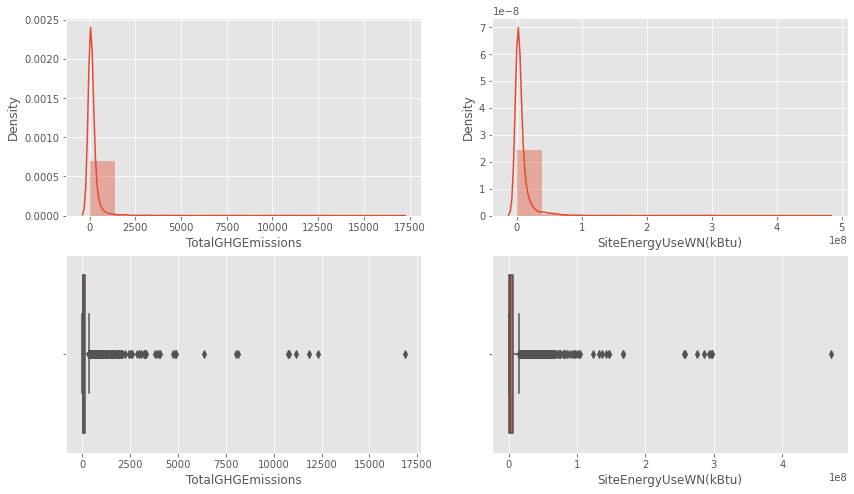

In [29]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,predict in enumerate(["TotalGHGEmissions", "SiteEnergyUseWN(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(result[predict], bins=int(1 + np.log2(len(result))))
    plt.subplot(2,2,i+3)
    sns.boxplot(result[predict])
plt.show()

De nombreux batiments ont des emissions et de la consommation d'energie assez importante

Faisons la même chose avec une transformation logarithmique.

Elle permet en général de rapprocher des valeurs extrêmes pour obtenir des graphes de distribution moins étendus.

### Avec transformation

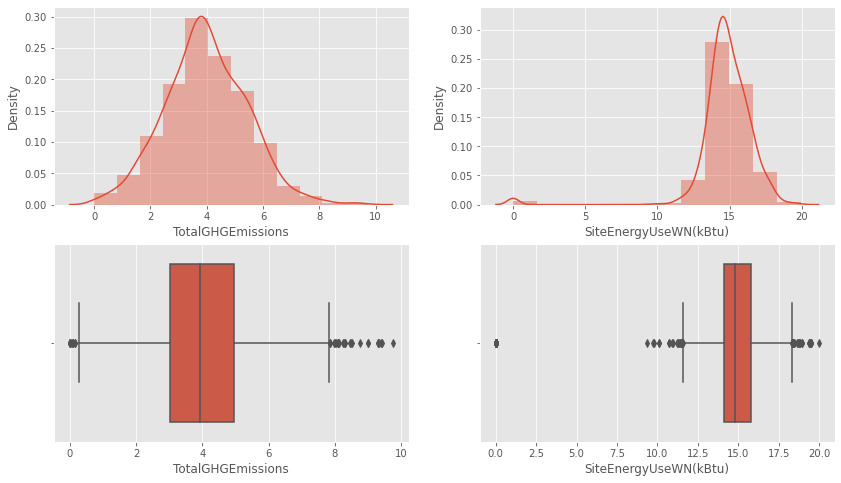

In [30]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,predict in enumerate(["TotalGHGEmissions", "SiteEnergyUseWN(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(result[predict].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(result))))
    plt.subplot(2,2,i+3)
    sns.boxplot(result[predict].apply(lambda x : np.log(1 + x)))
plt.show()

Maintenant que nos distributions suivent une loi normale, nous pouvons constaté que certains batiments ont de forte Emissions et consommation d'energie, tandis que d'autre, c'est l'inverse ! Cela vient peut être de l'age des batiments, de leur materiaux de construction et de leur utilité. Je décide donc de les garder.


# Analyse et Features engineering

Répartition des BuildingType

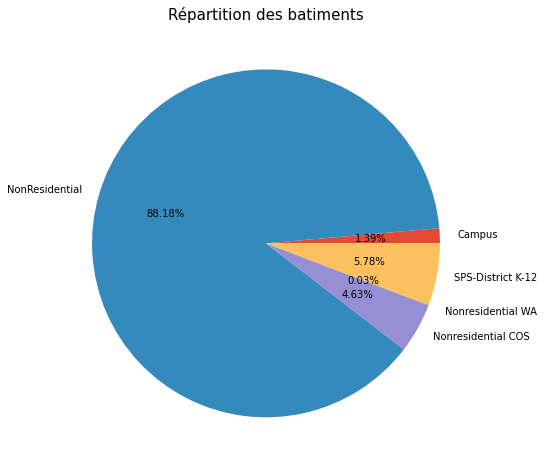

In [31]:
result['BuildingType'].value_counts(normalize=True).sort_index().plot(kind='pie', 
                                                                      autopct = lambda x: str(round(x,2)) + '%',
                                                                      figsize=(8,8))
plt.ylabel('')
plt.title('Répartition des batiments', fontsize = 15)
plt.show()

Regard sur les type de batiments

In [32]:
result.loc[(result['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    578
Other                          380
Large Office                   334
Mixed Use Property             200
Retail Store                   191
Non-Refrigerated Warehouse     181
Warehouse                      180
Hotel                          149
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                     9
Low-Rise Multifamily             3
Name: PrimaryPropert

Chagement de certains doublons

In [33]:
result.loc[result["PrimaryPropertyType"] == "Restaurant\n", "PrimaryPropertyType"] = "Restaurant"
result.loc[result["PrimaryPropertyType"] == "Distribution Center\n", "PrimaryPropertyType"] = "Distribution Center"
result.loc[result["PrimaryPropertyType"] == "Self-Storage Facility\n", "PrimaryPropertyType"] = "Self-Storage Facility"
result.loc[result["PrimaryPropertyType"] == "Supermarket / Grocery Store", "PrimaryPropertyType"] = "Supermarket/Grocery Store"

Regard sur les noms des quatiers

In [34]:
list((result['Neighborhood']).unique())

['DOWNTOWN',
 'SOUTHEAST',
 'NORTHEAST',
 'EAST',
 'CENTRAL',
 'NORTH',
 'MAGNOLIA / QUEEN ANNE',
 'LAKE UNION',
 'GREATER DUWAMISH',
 'BALLARD',
 'NORTHWEST',
 'SOUTHWEST',
 'DELRIDGE',
 'Central',
 'Ballard',
 'North',
 'Delridge',
 'Northwest',
 'DELRIDGE NEIGHBORHOODS']

In [35]:
result['Neighborhood'] = result['Neighborhood'].replace(['Central'], 'CENTRAL')
result['Neighborhood'] = result['Neighborhood'].replace(['Ballard'], 'BALLARD')
result['Neighborhood'] = result['Neighborhood'].replace(['North'], 'NORTH')
result['Neighborhood'] = result['Neighborhood'].replace(['Delridge'], 'DELRIDGE')
result['Neighborhood'] = result['Neighborhood'].replace(['Northwest'], 'NORTHWEST')


## Distribution sur le nombre de batiments

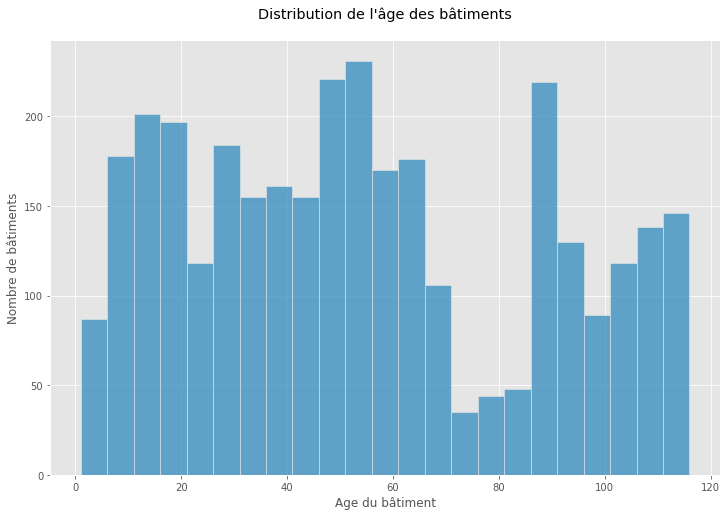

In [36]:
result['BuildingAge'] = result['DataYear'] - result['YearBuilt']
result.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=result, x='BuildingAge', bins=int((result.BuildingAge.max() - result.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()

## Matrice des corrélations

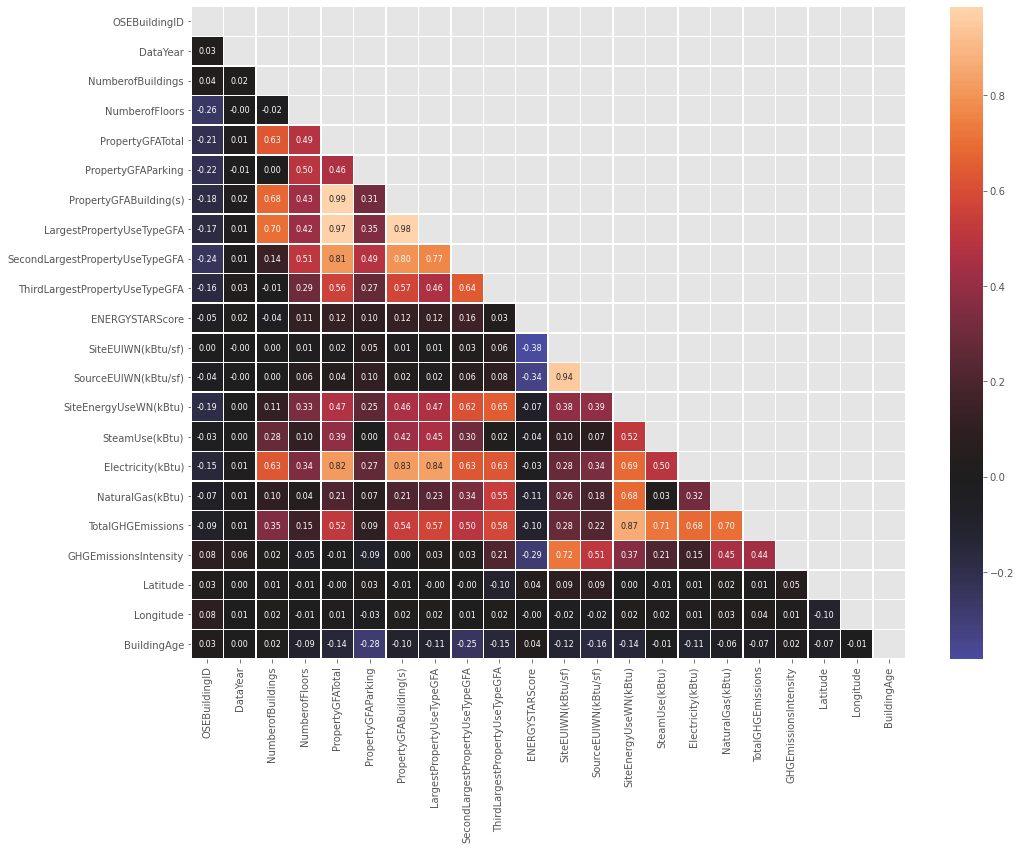

In [37]:
corr = result.corr()
diag = np.zeros_like(corr)
diag[np.triu_indices_from(diag)] = True
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, fmt=".2f", annot_kws={'size':8}, annot=True, linewidths=.5, ax=ax, center=0, mask=diag)
plt.show()

Pour les varaibles à prédire TotalGHGEmissions et SiteEnergyUse(kBtu), on remarque des corrélations linéaires quasi similaires avec les variables de relevés (les consommations) mais également avec le nombre de batiments ou d'étages ains que les surfaces au sol.

On remarque sur ce Heatmap de fortes corrélations linéaires entre variables. Ces corrélations peuvent amener des problèmes de colinéarité dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :


In [38]:
Coor_Sup = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > Coor_Sup)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
26,PropertyGFATotal,PropertyGFABuilding(s),0.986318
24,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.976089
22,LargestPropertyUseTypeGFA,PropertyGFATotal,0.971510
20,SourceEUIWN(kBtu/sf),SiteEUIWN(kBtu/sf),0.944694
18,TotalGHGEmissions,SiteEnergyUseWN(kBtu),0.868615
16,Electricity(kBtu),LargestPropertyUseTypeGFA,0.836142
14,Electricity(kBtu),PropertyGFABuilding(s),0.825159
12,PropertyGFATotal,Electricity(kBtu),0.815379
10,SecondLargestPropertyUseTypeGFA,PropertyGFATotal,0.811361
8,SecondLargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.797458


On remarque que les variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables. Nous allons donc créer de nouvelles variables pour tenter de gommer ces corrélations linéaires.

Nous allons donc créer une variable nous donnant le nombre total d'usage du bâtiment, puis supprimer la liste complète des usages.

In [39]:
result['Nombre_utilisation'] = [str(word).count(",") + 1 for word in result['ListOfAllPropertyUseTypes'].str.split(',')]
result.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA

In [40]:
def search(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

colonnes_gfa = search(result, suffix='GFA')
result[['Nombre_utilisation'] + colonnes_gfa].head(5)

,Nombre_utilisation,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,1,88434,0,88434,88434.0,NaN,NaN
1,3,103566,15064,88502,83880.0,15064.0,4622.0
2,3,961990,0,961990,757243.0,100000.0,0.0
3,1,61320,0,61320,61320.0,NaN,NaN
4,3,119890,12460,107430,123445.0,68009.0,0.0


In [41]:
#On calcule les ratios
result['Taux_Building'] = (round((result['PropertyGFABuilding(s)'].fillna(0)
                                  /result['PropertyGFATotal'].fillna(0)),5))
result['Taux_Parking'] = (round((result['PropertyGFAParking'].fillna(0)
                                 /result['PropertyGFATotal'].fillna(0)),5))

#On supprime les variables inutiles
result.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#On complète les usages de la partie la plus large
result['LargestPropertyUseType'] = result['LargestPropertyUseType'].fillna("Unknown")
result['NumberofFloors'] = result['NumberofFloors'].fillna(1)
result['NumberofBuildings'] = result['NumberofBuildings'].replace([0.0],1)
result['NumberofFloors'] = result['NumberofFloors'].replace([0.0],1)


Nous pouvons également calculer la surface moyenne par bâtiment et par étage :


In [42]:
result['surface_batiment'] = round((result['PropertyGFATotal'] / result['NumberofBuildings']),2)
result['surface_etage'] = round((result['PropertyGFATotal'] / result['NumberofFloors']),2)

In [43]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3307 non-null   int64  
 1   DataYear                       3307 non-null   int64  
 2   BuildingType                   3307 non-null   object 
 3   PrimaryPropertyType            3307 non-null   object 
 4   PropertyName                   3307 non-null   object 
 5   TaxParcelIdentificationNumber  3306 non-null   object 
 6   CouncilDistrictCode            3307 non-null   object 
 7   Neighborhood                   3307 non-null   object 
 8   NumberofBuildings              3307 non-null   float64
 9   NumberofFloors                 3307 non-null   float64
 10  PropertyGFATotal               3307 non-null   int64  
 11  LargestPropertyUseType         3307 non-null   object 
 12  YearsENERGYSTARCertified       188 non-null    o

Maitenant que nos données sont complétées, regardons l'impact de nos features engineering

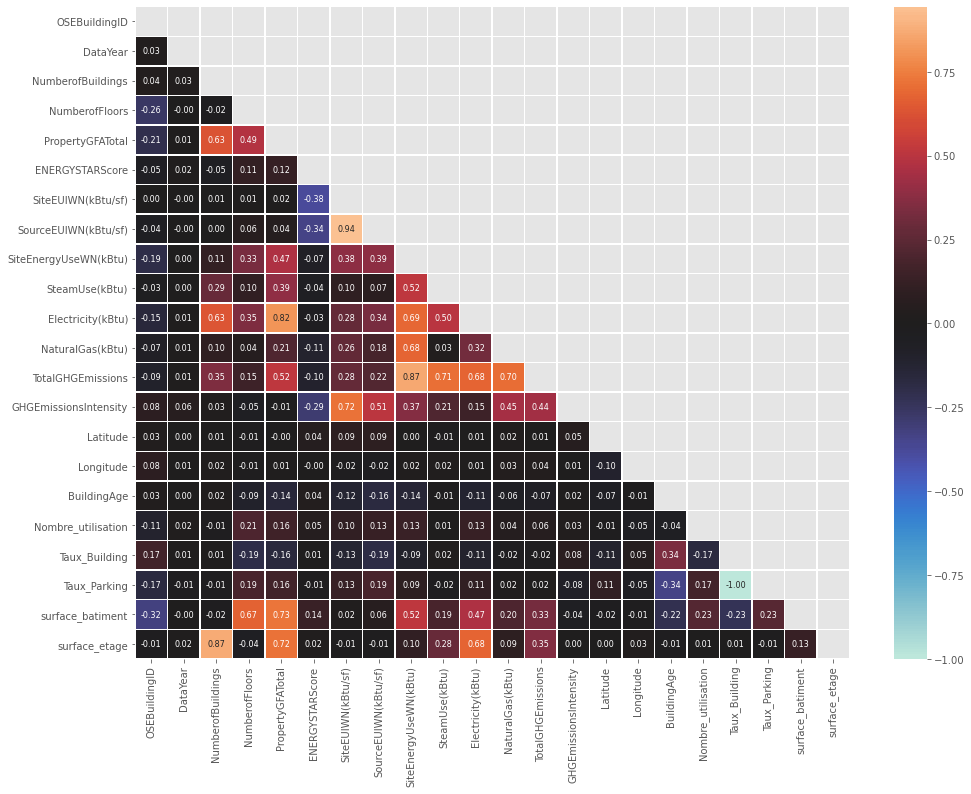

In [44]:
corr = result.corr()
diag = np.zeros_like(corr)
diag[np.triu_indices_from(diag)] = True
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, fmt=".2f", annot_kws={'size':8}, annot=True, linewidths=.5, ax=ax, center=0, mask=diag)
plt.show()

## Vérification du VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_variables = (result.select_dtypes(include=['float', 'int64']).drop(columns={'ENERGYSTARScore'}))

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i)
for i in range(len(X_variables.columns))]
vif_data[vif_data['VIF'] > 10]

,feature,VIF
2,NumberofBuildings,1.102119e+01
4,PropertyGFATotal,6.110074e+01
5,SiteEUIWN(kBtu/sf),4.286249e+01
6,SourceEUIWN(kBtu/sf),2.912880e+01
7,SiteEnergyUseWN(kBtu),3.119434e+01
8,SteamUse(kBtu),1.371107e+10
9,Electricity(kBtu),1.240752e+09
10,NaturalGas(kBtu),1.482335e+10
11,TotalGHGEmissions,3.741432e+10
17,Taux_Building,3.869803e+07


Des scores VIF supérieur à 10 indiquent généralement une forte multicolinéarité. Ces variables fortement corrélées risquent d'impacter nos modèles.
Les features suffixées EUIWN(kBtu/sf), sont des variables dont les valeurs sont ramenées à la surface par étage. Nous allons les supprimer car nous avons créer des variables pouvant permettre de ramener nos données à l'étage ou au building. Idem pour la variable GHGEmissionsIntensity

In [46]:
result = result.drop(columns={'SiteEUIWN(kBtu/sf)',
                              'SourceEUIWN(kBtu/sf)',
                              'GHGEmissionsIntensity'})

## Répartition des données sur la consommation et les emissions

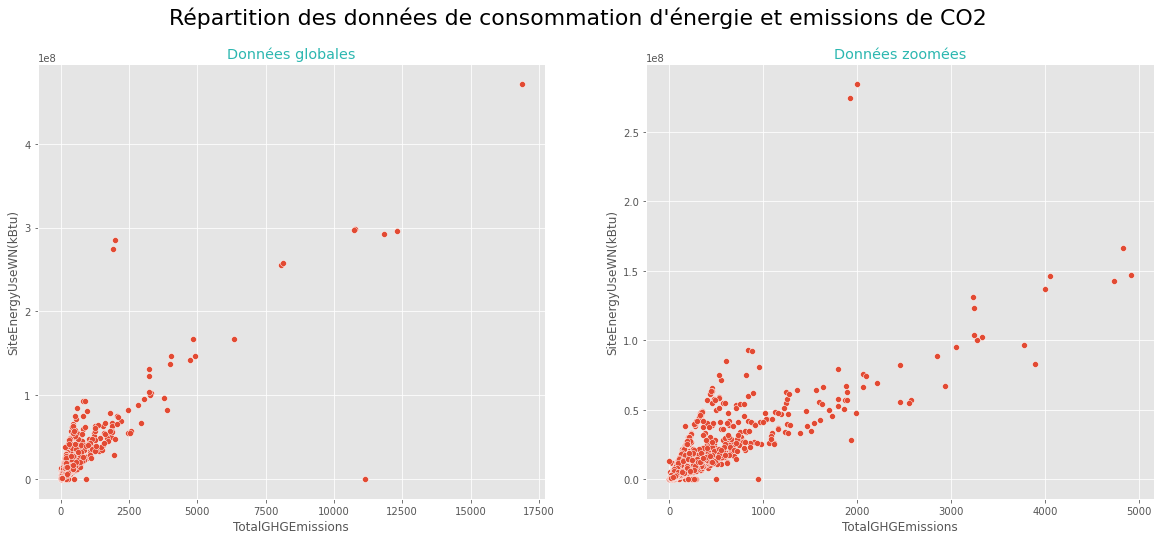

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=result, x="TotalGHGEmissions", y="SiteEnergyUseWN(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=result[(result['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUseWN(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie et emissions de CO2", fontsize=22)
plt.show()

On remarque ici que la répartion des données d'emission de CO2 en fonction de la consommation d'énergie ne suivent pas uniquement 1 seule droite de régression linéaire si l'on zoom sur les données les plus représentées.

Regardons maintenant si la position géographique a un impact sur la consommation d'énergie et les émissions de CO2

## Analyse sur la consommation d'énergie par quartier

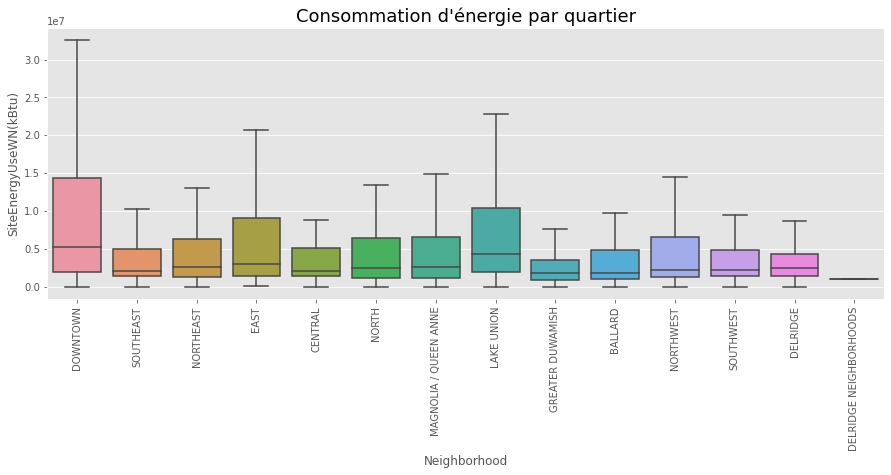

In [48]:
fig = plt.figure(1, figsize=(15,5))
sns.boxplot(data=result, x="Neighborhood" , y="SiteEnergyUseWN(kBtu)", showfliers=False)
plt.xticks(rotation=90)
plt.title('Consommation d\'énergie par quartier', fontsize = 18)
plt.show()



Et par Emission

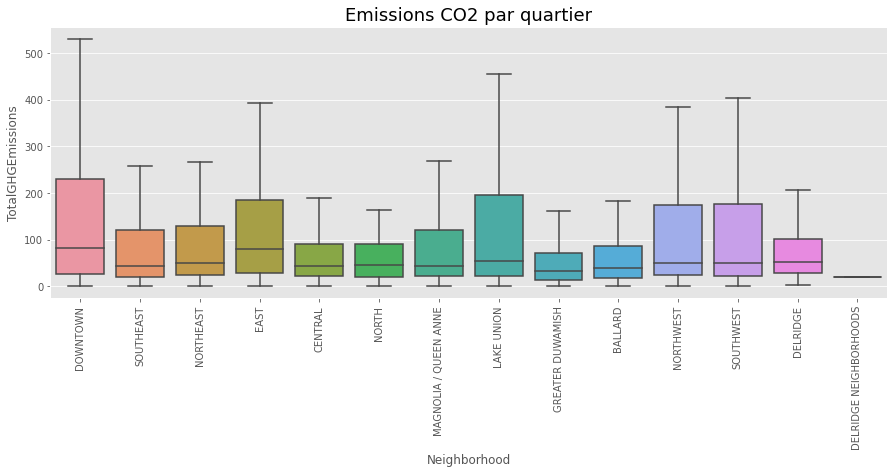

In [49]:
fig = plt.figure(1, figsize=(15,5))
sns.boxplot(data=result, x="Neighborhood" , y="TotalGHGEmissions", showfliers=False)
plt.xticks(rotation=90)
plt.title('Emissions CO2 par quartier', fontsize = 18)
plt.show()

Visiblement les batiments situés dans le quartier 'DOWNTOWN' et 'LAKE UNION' sont de gros consommateur d'énergie et d'emission.

Regardons a présent pour le type des batiments

## Analyse sur la consommation par Type de batiment

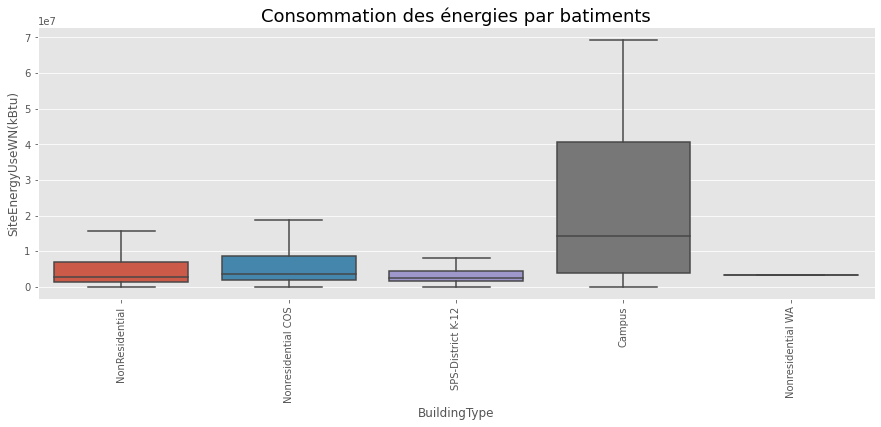

In [50]:
fig = plt.figure(1, figsize=(15,5))
sns.boxplot(data=result, x="BuildingType" , y="SiteEnergyUseWN(kBtu)", showfliers=False)
plt.xticks(rotation=90)
plt.title('Consommation des énergies par batiments', fontsize=18)
plt.show()

de meme pour les emissions

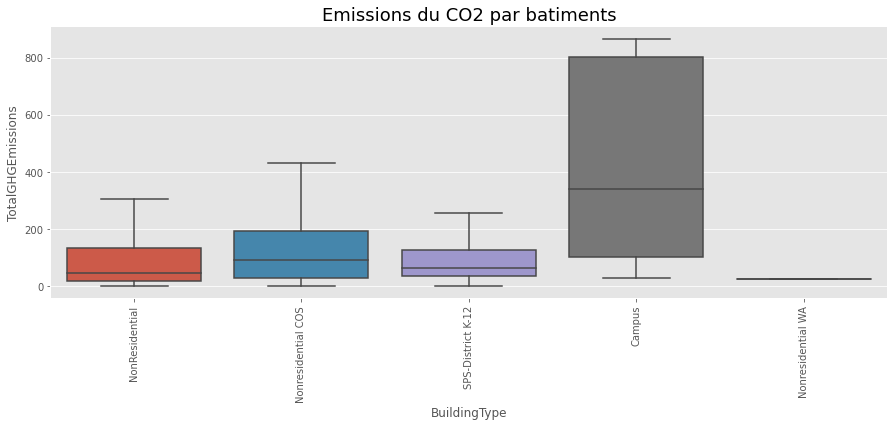

In [51]:
fig = plt.figure(1, figsize=(15,5))
sns.boxplot(data=result, x="BuildingType" , y="TotalGHGEmissions", showfliers=False)
plt.xticks(rotation=90)
plt.title('Emissions du CO2 par batiments', fontsize=18)
plt.show()

Les campus se demarquent  en étant de gros consommateurs d'énergie et d'émission de CO2.


## Regardons les utilisations de batiments maintenant

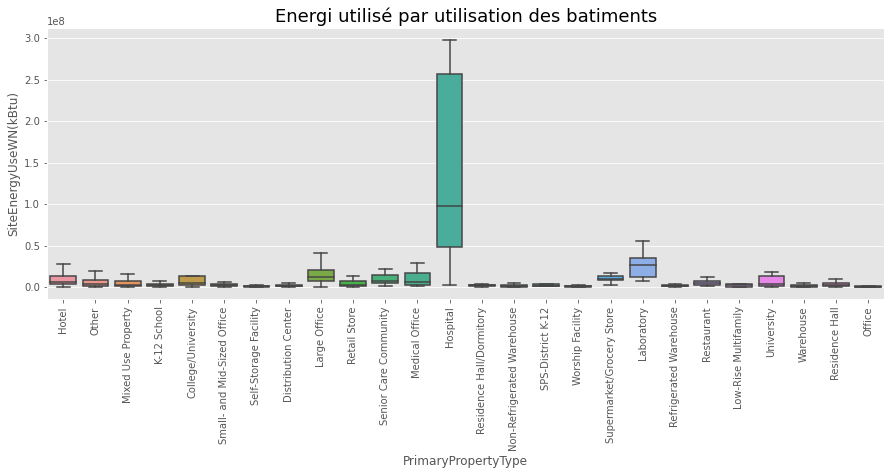

In [52]:
fig = plt.figure(1, figsize=(15,5))
sns.boxplot(data=result, x="PrimaryPropertyType" , y="SiteEnergyUseWN(kBtu)", showfliers=False)
plt.xticks(rotation=90)
plt.title('Energi utilisé par utilisation des batiments', fontsize =18)
plt.show()

Les hopitaux sont de gros consommateur aussi,

Nous pouvons regrouper plusieurs type de batiment entre eux

In [53]:
result['PrimaryPropertyType'] = result['PrimaryPropertyType'].replace(['University'], 'College/University')
result['PrimaryPropertyType'] = result['PrimaryPropertyType'].replace(['SPS-District K-12'], 'K-12 School')

Nous allons ensuite supprimer les variables qui ne seront d'uncune utilité pour nos prédictions

In [54]:
result = result.drop(columns={'DataYear',
                              'DefaultData', 
                              'ComplianceStatus',
                              'City',
                              'State',
                              'ZipCode',
                              'Address',
                              'TaxParcelIdentificationNumber',
                              'CouncilDistrictCode',
                              'YearsENERGYSTARCertified',
                              'Latitude',
                              'Longitude'})

In [55]:
result.to_csv('seattle_clean', index=False)
